# Assignment 6: Neural Network Showdown

Build and compare neural network architectures on image and time-series data.

## Setup

In [1]:
%pip install -q -r requirements.txt

# GPU acceleration (platform-specific)
import platform
if platform.system() == "Darwin" and platform.machine() == "arm64":
    %pip install -q tensorflow-metal

%reset -f

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
%matplotlib inline
import matplotlib 
import os
import json
import numpy as np
import pandas as pd

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)

# Report available accelerators
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPU acceleration: {len(gpus)} device(s)")
    for gpu in gpus:
        print(f"  {gpu.name}")
else:
    print("No GPU detected — using CPU")

from tensorflow import keras
from keras import Sequential
from keras.layers import (
    Dense, Flatten, Dropout, Conv2D, MaxPooling2D, LSTM, Input
)
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix

from helpers import (
    load_cifar10, load_ecg5000,
    plot_training_history, plot_confusion_matrix,
    plot_sample_images, plot_ecg_traces, plot_predictions,
    CIFAR10_CLASSES, ECG_CLASSES,
)

OUTPUT_DIR = "output"
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("Setup complete!")

No GPU detected — using CPU
Setup complete!


---

## Part 1: Dense Baseline on CIFAR-10

**Task:** Build a Dense (fully connected) network to classify CIFAR-10 images.

CIFAR-10 has 60,000 color images (32x32x3) across 10 classes. A Dense network
flattens each image into 3,072 numbers and classifies from there. This is our
baseline — it ignores spatial structure entirely.

**Architecture requirements:**
- Flatten the input
- At least 2 hidden Dense layers with ReLU activation
- Dropout after each hidden layer
- Output: Dense(10, softmax)

In [6]:

print("Part 1: Dense Baseline on CIFAR-10")
print("-" * 40)

# Load data (normalized to [0,1], one-hot encoded)
X_train, y_train, X_test, y_test = load_cifar10()
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Part 1: Dense Baseline on CIFAR-10
----------------------------------------
Train: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)


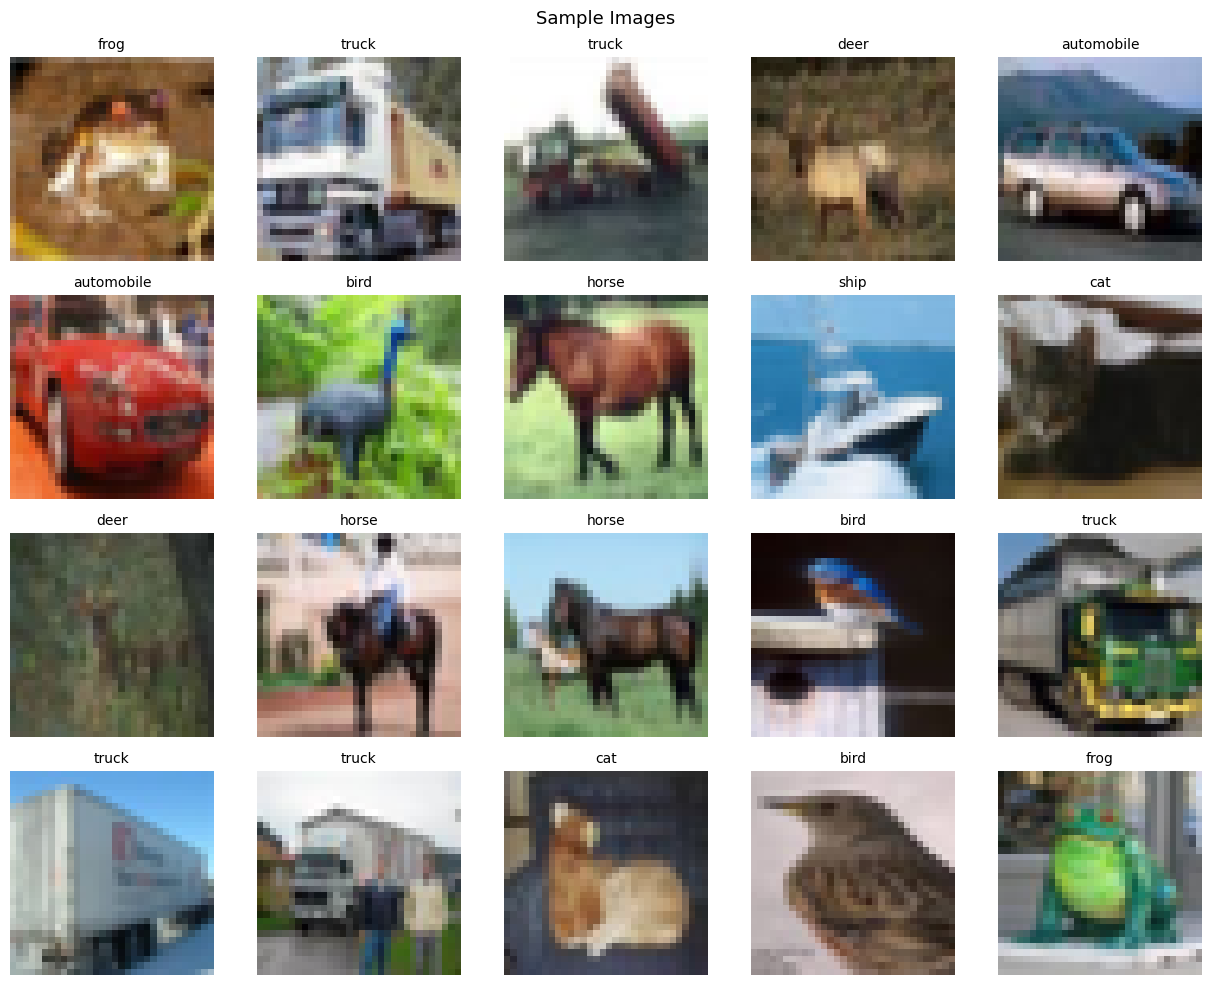

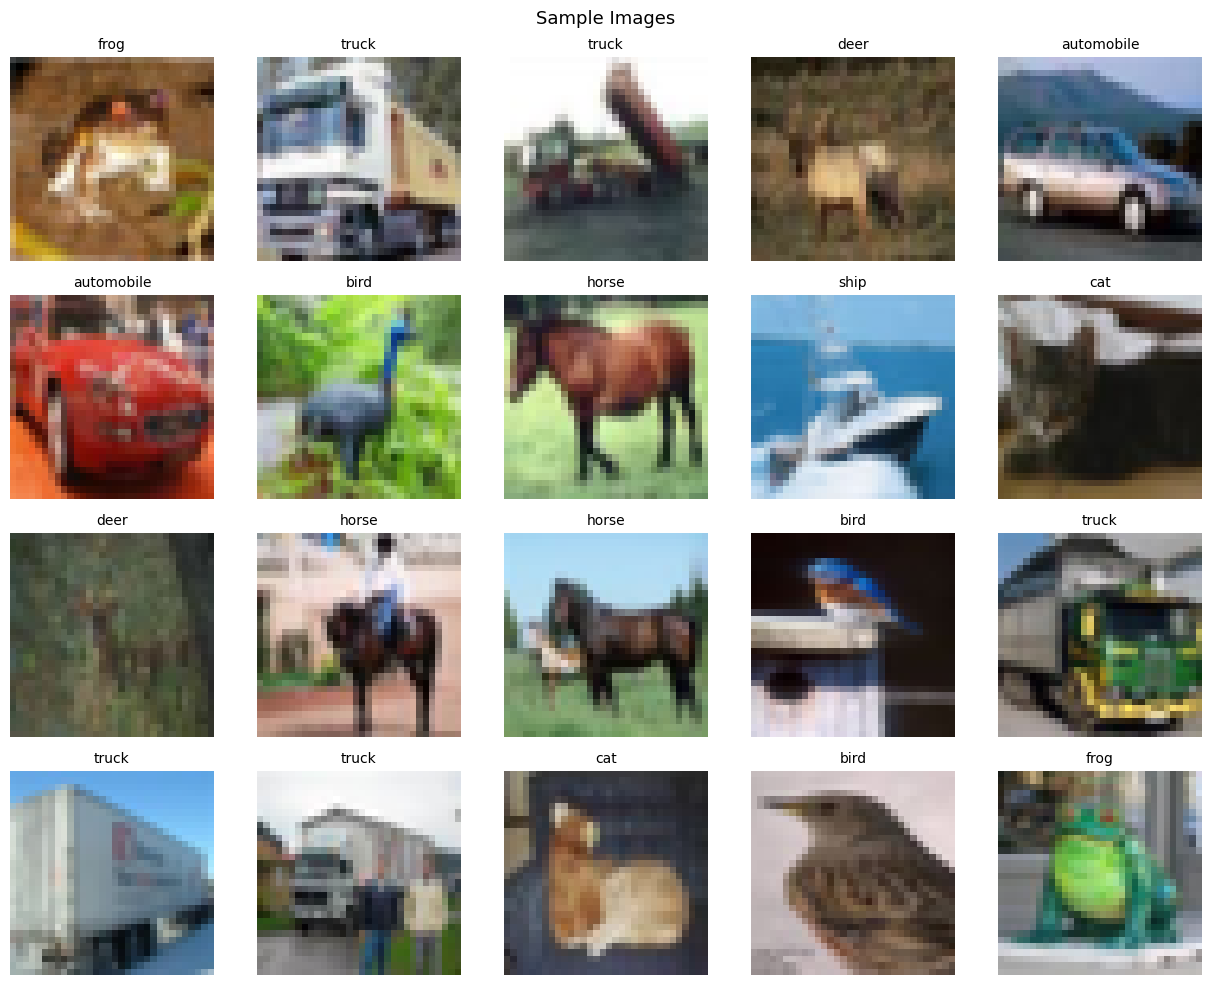

In [7]:
# Visualize some training images to verify data loaded correctly
plot_sample_images(X_train, y_train, CIFAR10_CLASSES)


In [ ]:
# TODO: Build a Dense model using Sequential
# Tip: call model_dense.summary() after building to verify your architecture
# Requirements:
#   - Input(shape=(32, 32, 3))
#   - Flatten()
#   - At least 2 Dense hidden layers with activation='relu'
#   - Dropout after each hidden Dense layer
#   - Dense(10, activation='softmax') as output
model_dense = None  # replace with your Sequential model

In [ ]:
# TODO: Compile the model
# model_dense.compile(optimizer='adam',
#                     loss='categorical_crossentropy',
#                     metrics=['accuracy'])

In [ ]:
# TODO: Train with EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss', patience=3,
#                            restore_best_weights=True)
# history_dense = model_dense.fit(X_train, y_train,
#                                 epochs=20, batch_size=128,
#                                 validation_split=0.1,
#                                 callbacks=[early_stop])
history_dense = None  # replace with your fit call

In [ ]:
# TODO: Evaluate on test set
# test_loss, test_acc = model_dense.evaluate(X_test, y_test, verbose=0)
test_acc = None  # replace

# TODO: Generate predictions and confusion matrix
# y_pred = np.argmax(model_dense.predict(X_test, verbose=0), axis=1)
# y_true = np.argmax(y_test, axis=1)
# cm = confusion_matrix(y_true, y_pred)
y_pred = None  # replace
y_true = None  # replace
cm = None  # replace

In [ ]:
# Optional: visualize predictions and confusion matrix to diagnose issues
# plot_predictions(X_test, y_true, y_pred, CIFAR10_CLASSES)
# plot_confusion_matrix(y_true, y_pred, list(CIFAR10_CLASSES.values()),
#                       os.path.join(OUTPUT_DIR, "part1_confusion_matrix.png"))

In [ ]:
# Save results (do not modify this cell)
results = {
    "accuracy": float(test_acc),
    "confusion_matrix": cm.tolist(),
}
with open(os.path.join(OUTPUT_DIR, "part1_results.json"), "w") as f:
    json.dump(results, f, indent=2)

print(f"Dense accuracy: {test_acc:.4f}")
print("Saved output/part1_results.json")

---

## Part 2: CNN on CIFAR-10

**Task:** Build a CNN to classify the same CIFAR-10 images. Compare its accuracy
to the Dense baseline from Part 1.

CNNs use convolutional filters that slide across the image, detecting local
patterns (edges, textures, shapes). This preserves spatial structure that
Dense layers discard.

**Architecture requirements:**
- At least 2 Conv2D + MaxPooling2D blocks
- Flatten, then Dense hidden layer with Dropout
- Output: Dense(10, softmax)

In [ ]:
print("\nPart 2: CNN on CIFAR-10")
print("-" * 40)

# Data is already loaded from Part 1 (X_train, y_train, X_test, y_test)

In [ ]:
# TODO: Build a CNN model using Sequential
# Requirements:
#   - Input(shape=(32, 32, 3))
#   - At least 2 blocks of: Conv2D(filters, (3,3), activation='relu')
#                            + MaxPooling2D((2,2))
#   - Flatten()
#   - Dense hidden layer with ReLU + Dropout
#   - Dense(10, activation='softmax') as output
# Tip: call model_cnn.summary() after building to check layer shapes and param counts
model_cnn = None  # replace with your Sequential model

In [ ]:
# TODO: Compile the model
# model_cnn.compile(optimizer='adam',
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])

In [ ]:
# TODO: Train with EarlyStopping and ModelCheckpoint
# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=3,
#                   restore_best_weights=True),
#     ModelCheckpoint('output/best_cnn.keras',
#                     save_best_only=True, monitor='val_accuracy'),
# ]
# history_cnn = model_cnn.fit(X_train, y_train,
#                             epochs=15, batch_size=64,
#                             validation_split=0.1,
#                             callbacks=callbacks)
history_cnn = None  # replace with your fit call

In [ ]:
# TODO: Plot training history
# plot_training_history(history_cnn,
#                       os.path.join(OUTPUT_DIR, "part2_training_history.png"))

In [ ]:
# TODO: Evaluate on test set
# cnn_loss, cnn_acc = model_cnn.evaluate(X_test, y_test, verbose=0)
cnn_acc = None  # replace

# TODO: Generate predictions and confusion matrix
# y_pred_cnn = np.argmax(model_cnn.predict(X_test, verbose=0), axis=1)
# y_true_cnn = np.argmax(y_test, axis=1)
# cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)
y_pred_cnn = None  # replace
y_true_cnn = None  # replace
cm_cnn = None  # replace

In [ ]:
# Optional: visualize predictions and confusion matrix to diagnose issues
# plot_predictions(X_test, y_true_cnn, y_pred_cnn, CIFAR10_CLASSES)
# plot_confusion_matrix(y_true_cnn, y_pred_cnn, list(CIFAR10_CLASSES.values()),
#                       os.path.join(OUTPUT_DIR, "part2_confusion_matrix.png"))

In [ ]:
# Save results (do not modify this cell)
results_cnn = {
    "accuracy": float(cnn_acc),
    "confusion_matrix": cm_cnn.tolist(),
}
with open(os.path.join(OUTPUT_DIR, "part2_results.json"), "w") as f:
    json.dump(results_cnn, f, indent=2)

comparison = pd.DataFrame([
    {"model": "Dense", "accuracy": float(test_acc)},
    {"model": "CNN", "accuracy": float(cnn_acc)},
])
comparison.to_csv(os.path.join(OUTPUT_DIR, "part2_comparison.csv"), index=False)

print(f"CNN accuracy:   {cnn_acc:.4f}")
print(f"Dense accuracy: {test_acc:.4f}")
print(f"Improvement:    {cnn_acc - test_acc:+.4f}")
print("Saved output/part2_results.json and output/part2_comparison.csv")

---

## Part 3: LSTM on ECG5000

**Task:** Build an LSTM to classify heartbeat recordings.

ECG5000 contains 5,000 heartbeat recordings — each is 140 time steps of voltage
measurements, classified into 5 types (Normal, Supraventricular, Premature
Ventricular, Fusion, Unknown). This is sequential data where order matters,
making it a natural fit for recurrent networks.

**Architecture requirements:**
- LSTM layer (any reasonable number of units)
- Dropout for regularization
- Dense output with softmax (5 classes)

In [ ]:
print("\nPart 3: LSTM on ECG5000")
print("-" * 40)

# Load ECG data (already shaped for RNN input)
X_train_ecg, y_train_ecg, X_test_ecg, y_test_ecg = load_ecg5000()
print(f"Train: {X_train_ecg.shape}, Test: {X_test_ecg.shape}")
print(f"Classes: {list(ECG_CLASSES.values())}")

In [ ]:
# Visualize ECG traces to understand the data
plot_ecg_traces(X_train_ecg, y_train_ecg, ECG_CLASSES)

In [ ]:
# TODO: Build an LSTM model using Sequential
# Requirements:
#   - Input(shape=(140, 1))
#   - LSTM layer (e.g., 64 units)
#   - Dropout
#   - Dense(5, activation='softmax')
# Tip: call model_lstm.summary() after building to verify your architecture
model_lstm = None  # replace with your Sequential model

In [ ]:
# TODO: Compile the model
# model_lstm.compile(optimizer='adam',
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])

In [ ]:
# TODO: Train with EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss', patience=5,
#                            restore_best_weights=True)
# history_lstm = model_lstm.fit(X_train_ecg, y_train_ecg,
#                               epochs=30, batch_size=32,
#                               validation_split=0.1,
#                               callbacks=[early_stop])
history_lstm = None  # replace with your fit call

In [ ]:
# TODO: Plot training history
# plot_training_history(history_lstm,
#                       os.path.join(OUTPUT_DIR, "part3_training_history.png"))

In [ ]:
# TODO: Evaluate on test set
# lstm_loss, lstm_acc = model_lstm.evaluate(X_test_ecg, y_test_ecg, verbose=0)
lstm_acc = None  # replace

# TODO: Generate predictions and confusion matrix
# y_pred_ecg = np.argmax(model_lstm.predict(X_test_ecg, verbose=0), axis=1)
# y_true_ecg = np.argmax(y_test_ecg, axis=1)
# cm_ecg = confusion_matrix(y_true_ecg, y_pred_ecg)
y_pred_ecg = None  # replace
y_true_ecg = None  # replace
cm_ecg = None  # replace

In [ ]:
# Optional: visualize confusion matrix to see which heartbeat types are confused
# plot_confusion_matrix(y_true_ecg, y_pred_ecg, list(ECG_CLASSES.values()),
#                       os.path.join(OUTPUT_DIR, "part3_confusion_matrix.png"))

In [ ]:
# Save results (do not modify this cell)
results_ecg = {
    "accuracy": float(lstm_acc),
    "confusion_matrix": cm_ecg.tolist(),
}
with open(os.path.join(OUTPUT_DIR, "part3_results.json"), "w") as f:
    json.dump(results_ecg, f, indent=2)

print(f"LSTM accuracy: {lstm_acc:.4f}")
print("Saved output/part3_results.json")

---

## Validation

In [ ]:
print("\nAll parts complete!")
print("Run 'pytest .github/tests/ -v' in your terminal to check your work.")